option 1: convert to csv file- https://pub.towardsai.net/how-to-create-a-new-custom-dataset-from-images-9b95977964ab

option 2: manually process with PIL 

current classifications: 

0: good (g)
1: low pressure (l)
2: too close (t)

In [2]:
# option 1: 

In [11]:
# Convert the images into a CSV
# Run the following code to convert all the images into a CSV and label them accordingly.

from PIL import Image
import numpy as np
import sys
import os
import csv


# default format can be changed as needed
def createFileList(myDir, format='.png'):
    fileList = []
    print(myDir)
    labels = []
    names = []
    keywords = {"G" : "0","L": "1", "T" : "2"} # keys and values updated to test data
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
            for keyword in keywords:
                if keyword in name:
                    labels.append(keywords[keyword])
            names.append(name)
    return fileList, labels, names


# load the original image
myFileList, labels, names  = createFileList('trainingtest/')
i = 0
for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()
# get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode
# Make image Greyscale
    img_grey = img_file.convert('L') # L for greyscale, RGB for colored - can probably just use greyscale later? 
    #img_grey.save('result.png')
    #img_grey.show()
# Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((width, height)) # must add third parameter 3 for RGB
    value = value.flatten()
    
    value = np.append(value,labels[i])
    i +=1
    
    print(value)
    with open("test_data.csv", 'a') as f: # save file as test_data.csv
        writer = csv.writer(f)
        writer.writerow(value)

trainingtest/
trainingtest/Good1.png
['82' '82' '82' ... '81' '78' '0']
trainingtest/Good2.png
['113' '112' '113' ... '87' '87' '0']
trainingtest/Good3.png
['83' '83' '85' ... '185' '186' '0']
trainingtest/Good4.png
['94' '94' '94' ... '119' '119' '0']
trainingtest/Good5.png
['104' '105' '105' ... '103' '104' '0']
trainingtest/Good6.png
['124' '122' '119' ... '84' '83' '0']
trainingtest/Good7.png
['127' '129' '130' ... '145' '140' '0']
trainingtest/Good8.png
['118' '118' '120' ... '125' '125' '0']
trainingtest/Good9.png
['94' '95' '96' ... '101' '102' '0']
trainingtest/Lowpressure1.png
['49' '49' '49' ... '114' '113' '1']
trainingtest/Lowpressure2.png
['98' '98' '98' ... '35' '34' '1']
trainingtest/Lowpressure3.png
['98' '99' '100' ... '178' '181' '1']
trainingtest/Lowpressure4.png
['101' '102' '103' ... '174' '176' '1']
trainingtest/Lowpressure5.png
['120' '120' '120' ... '96' '96' '1']
trainingtest/Tooclose1.png
['103' '104' '105' ... '176' '177' '2']
trainingtest/Tooclose2.png
['105

<ipython-input-11-227a9db8cbec>:46: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((width, height)) # must add third parameter 3 for RGB


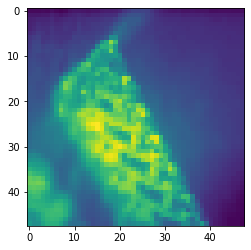

In [13]:
# Load the CSV

import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
 
dataset_path = 'test_data.csv'
image_size=(48,48) #add 3 if RGB image
 
def load():
    data = pd.read_csv(dataset_path)
    pixels = data['Pixels'].tolist()
    width, height= 48, 48 ,# add depth 3 if RGB image
    faces = []
    for pixel_sequence in pixels:
        face = [int(pixel) for pixel in pixel_sequence.split(' ')]
        face = np.asarray(face).reshape(width, height,) #add depth if RGB image
        a = face
        face = np.resize(face.astype('uint8'),image_size)
        faces.append(face.astype('float32'))
    faces = np.asarray(faces)
    A = faces
    faces = np.expand_dims(faces, -1)
    return faces, A
 
faces,A = load()
plt.imshow(A[0].astype("uint8"))